# 前言：
這篇主要是記錄我在台中人工智慧學校助教培訓第一周kaggle測驗的成果，題目是房價預測。<br>
kaggle測驗的連結:https://www.kaggle.com/c/house-prices-advanced-regression-techniques<br>
<br>
在本次測驗中，主要是練習機械學習的整個流程<br>
Step1 定義問題<br>
-閱讀資料、網站上的說明<br><br>
Step2 蒐集、清理資料<br>
-處理空值<br>
-Group<br>
-離群值<br>
-分類數據轉換<br>
-處理數據偏差<br>
-正規化數據<br><br>
Step3 選擇及建立模型<br>
-選擇模型<br>
-調整參數<br><br>
Step4 分析結果及修正模型<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文

%matplotlib inline
#matplotlib 是python擴充的畫圖funtion，inline表示將圖表鑲嵌進netbook(不會在新視窗中呈現)
#%用於類似下terminal指令

In [2]:
# Load in the train datasets
test = pd.read_csv('data/test.csv', dtype = {'type': np.int32})
train = pd.read_csv('data/train.csv', dtype = {'type': np.int32})
submission = pd.read_csv('data/sample_submission.csv')

# 定義問題-觀察資料
## 在這個階段，主要要先了解資料。
* 透過看train、test Data的Size、describe...各項資料<br>
* 閱讀discription<br>
增加我們對資料的了解
<br><br>
用shape、head、describe等panda提供的方法來看資料的基本資料<br>
觀察price的分布圖

In [3]:
print('test.shape: ')
print(test.shape)
print('train.shape: ')
print(train.shape)
#print("------------------------")
#train.info()

test.shape: 
(1459, 80)
train.shape: 
(1460, 81)


In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


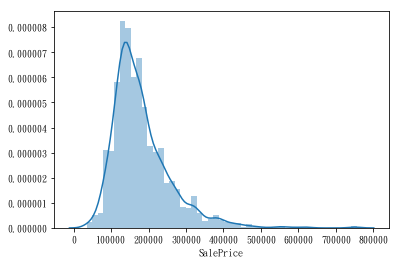

In [5]:
train['SalePrice'].describe()
sns.distplot(train['SalePrice'])

In [5]:
print(train.dtypes)
train.describe()

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 資料處理

In [6]:
# 移除id欄位 因為ID對我們來說沒有用
train.drop("Id", inplace=True, axis=1)
test.drop("Id", inplace=True, axis=1)

print("The train.shape after remoting id: {} ".format(train.shape))
print("The test.shape after remoting id: {} ".format(test.shape))

The train.shape after remoting id: (1460, 80) 
The test.shape after remoting id: (1459, 79) 


In [7]:
# 列出train、test中 資料缺失的情況

# For training Data
count_nans = len(train) - train.count() #缺失的筆數
df_count_nans = count_nans.to_frame()
df_count_nans.columns=["train_nan_count"]
df_count_nans["%_train_nans"]=(df_count_nans["train_nan_count"]/train.shape[0]) * 100

# For test data
df_count_nans["test_nan_count"] = len(test) - test.count()
df_count_nans["%_test_nans"]=(df_count_nans["test_nan_count"]/test.shape[0]) * 100

df_count_nans.sort_values("train_nan_count", ascending=False, inplace=True)
df_count_nans.query('train_nan_count > 0 or test_nan_count > 0')

,train_nan_count,%_train_nans,test_nan_count,%_test_nans
PoolQC,1453,99.520548,1456.0,99.794380
MiscFeature,1406,96.301370,1408.0,96.504455
Alley,1369,93.767123,1352.0,92.666210
Fence,1179,80.753425,1169.0,80.123372
FireplaceQu,690,47.260274,730.0,50.034270
LotFrontage,259,17.739726,227.0,15.558602
GarageYrBlt,81,5.547945,78.0,5.346127
GarageCond,81,5.547945,78.0,5.346127
GarageType,81,5.547945,76.0,5.209047
GarageFinish,81,5.547945,78.0,5.346127


# 合併train、test
在開始處理資料前，先合併train、test

In [8]:
# 在合併train、test data之前 先將"SalePrice"拿掉
y_train = train.SalePrice.values
print(y_train)
train.drop("SalePrice", inplace=True, axis=1)

[208500 181500 223500 ... 266500 142125 147500]


In [9]:
# 合併所有數據以利後面進行進一步處理
df_all_data = pd.concat([train, test])
df_all_data.reset_index(inplace=True, drop=True)
print(df_all_data.shape)
df_all_data.columns
df_all_data.head()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# 處理空值

In [10]:
df_all_data.drop(["PoolQC", "Alley", "MiscFeature", "Fence"], axis=1, inplace=True)

In [11]:
#壁爐質量 沒有壁爐的就填入None
df_all_data["FireplaceQu"].fillna("None", inplace=True)

#車庫有關的分類 沒有車庫所以填入None 車庫建成年分 填入0
df_all_data[["GarageCond", "GarageType", "GarageFinish", "GarageQual"]] = df_all_data[["GarageCond", "GarageType", "GarageFinish", "GarageQual"]].fillna("None")
#train["GarageYrBlt"].fillna(0,  inplace=True)

# 這邊跟地下室有關 屬性分類的填入None 數值的填入0
df_all_data[["BsmtExposure","BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual"]] = df_all_data[["BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual"]].fillna("None")
df_all_data[["BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtHalfBath"]] = df_all_data[["BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtHalfBath"]].fillna(0)

# 跟外牆有關的分類
df_all_data["MasVnrArea"].fillna(0, inplace=True)
df_all_data["MasVnrType"].fillna("None", inplace=True)

# 電力系統 只有一筆空值 填入眾數
most_common = df_all_data["Electrical"].value_counts().index[0]
df_all_data["Electrical"].fillna(most_common, inplace=True)

# 根據說明檔中描述:沒有必要就填Typ
df_all_data["Functional"].fillna("Typ", inplace=True)

# 廚房質量:考慮到房子應該不可能沒有廚房，填入TA(中間值)
df_all_data["KitchenQual"].fillna("TA", inplace=True)

# 銷售種類:因為不確定空值的種類，就當成最多的那個(眾數)
most_common =  df_all_data["SaleType"].value_counts().index[0]
df_all_data["SaleType"].fillna(most_common, inplace=True)

# 沒辦法定義空值的，填入None
df_all_data["Utilities"].fillna("None", inplace=True)
df_all_data["Exterior1st"].fillna("None", inplace=True)
df_all_data["Exterior2nd"].fillna("None", inplace=True)

# 售屋的分區，填入眾數
most_common =  df_all_data["MSZoning"].value_counts().index[0]
df_all_data["MSZoning"].fillna(most_common, inplace=True)

# 車庫:填入平均值
df_all_data[['GarageCars']] = df_all_data[['GarageCars']].fillna(np.mean(train[['GarageCars']]))
df_all_data[['GarageArea']] = df_all_data[['GarageArea']].fillna(np.mean(train[['GarageArea']]))

# LotFrontage(int) 正面連接街道的線性大小 填入同種類的平均數
df_all_data["LotFrontage"] = train.groupby("BldgType")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

# Group

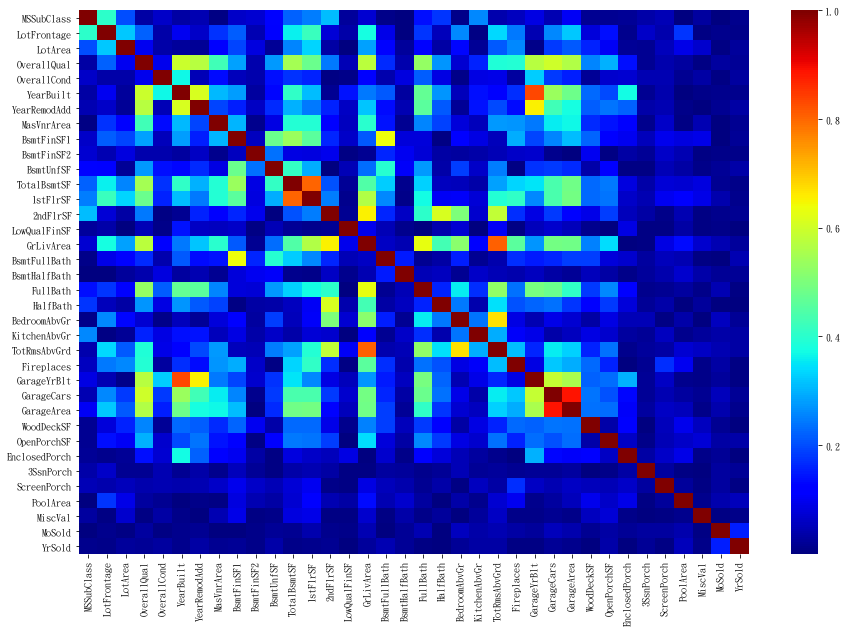

In [12]:
# Find highly correlated features
corr_matrix = df_all_data.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="jet")

In [13]:
# 選擇相關矩陣的上三角形
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 找出相關性>0.75的feature
to_drop = [column for column in upper.columns if any(upper[column] >= 0.75)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


將相關程度高於75%的特徵刪掉，以減少維度

GarageYrBlt和YearBlt具有高度相關性，因為車庫大多是在建造房屋時建造的。
GarageArea和GarageCars具有很高的相關性，因為車庫空間越大自然可以停下更多的車。
1stFlrSF和TotalBsmtSF是高度相關，這是有道理的，因為通常地下室通常位於一樓以下，大小一樣。
TotRmsAbvGrd和GrLivArea是相關的，地基大小跟房間總數成正相關，因為占地越大當然會有更多房間。

In [14]:
df_all_data.drop(to_drop, axis=1, inplace=True)

# 離群值
數據中可能會有誤差，較誇張的離群值是我們可以分辨出來的，找出他們並移除。<br>
GrLivArea是地上面積，買賣房子是照面積算的，所以面積越大、售價一定也越大，通過這點，我們可以知道GrLivArea的離峰值一定很好抓出來。

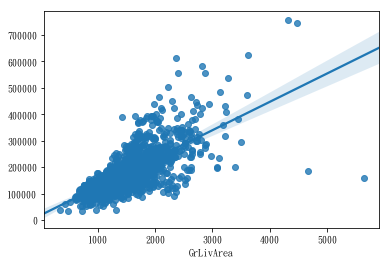

In [15]:
sns.regplot(x=train["GrLivArea"], y=y_train)

在上圖中我們可以看到右下角的兩個點。它們的面積超過4000平方英尺，但售價卻非常低。而像右上角的其他銷售以更高的價格出售。所以這兩個是異常值，應該刪除。否則模型將嘗試捕獲這些點並導致過度擬合。<br>
通過觀察，雖然還有其他異常值，但是大致上看來還是根據趨勢在走，所以先暫時留著。

In [16]:
drop_points = train.sort_values(by = 'GrLivArea', ascending = False)[:2]["GrLivArea"]
drop_points_list = drop_points.index.tolist()
df_all_data.drop(drop_points_list, inplace=True)

# 刪除異常值後，要更新dataframe的index
y_train = np.delete(y_train, drop_points_list)
train_last_index=train.shape[0]-len(drop_points_list)

# 分類數據轉換

In [17]:
#MSSubClass是建築種類，以數值表示，所以我們把原本的種類編排後從1開始分類 例如所有的60變成4
df_all_data['MSSubClass'] = df_all_data['MSSubClass'].apply(str)
df_all_data["MSSubClass"] = LabelEncoder().fit_transform(df_all_data["MSSubClass"])

# 處理數據偏差

In [18]:
# 找出數據有偏差的特徵
skew_thresh = 0.5
skewed = df_all_data.skew().sort_values(ascending=False)
a=skewed[abs(skewed)>skew_thresh]

根據以上數據，數據中存在一些偏斜的數據。利用log轉換把他們橋正

In [19]:
skewed_cols = skewed[abs(skewed)>skew_thresh].index.tolist()
print(len(skewed_cols))
print(skewed_cols)
df_all_data[skewed_cols] = df_all_data[skewed_cols].apply(np.log1p)
df_all_data[skewed_cols].head()

24
['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'Fireplaces', 'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt']


,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,...,GrLivArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,Fireplaces,HalfBath,TotalBsmtSF,BsmtFullBath,OverallCond,YearBuilt
0,0.0,0.0,9.042040,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,7.444833,6.561031,5.017280,6.751101,0.000000,0.693147,6.753438,0.693147,1.791759,7.602900
1,0.0,0.0,9.169623,0.0,0.0,0.693147,0.0,0.000000,0.0,0.693147,...,7.141245,6.886532,5.652489,0.000000,0.693147,0.000000,7.141245,0.000000,2.197225,7.589336
2,0.0,0.0,9.328212,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,7.488294,6.188264,6.075346,6.765039,0.693147,0.693147,6.825460,0.693147,1.791759,7.601902
3,0.0,0.0,9.164401,0.0,0.0,0.693147,0.0,5.609472,0.0,0.000000,...,7.448916,5.379897,6.293419,6.629363,0.693147,0.000000,6.629363,0.693147,1.791759,7.557995
4,0.0,0.0,9.565284,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,7.695758,6.486161,6.196444,6.960348,0.693147,0.693147,7.044033,0.693147,1.791759,7.601402


# 正規化數據

## 對售價做對數轉換

In [20]:
# 對數轉換表示對高房價、低房價的預測錯誤，會同等對結果造成影響
y_train = np.log1p(y_train)

# One Hot encoding
把 categorical 的變量給變成 one－hot 的形式

In [21]:
df_all_data = pd.get_dummies(df_all_data)
df_all_data = df_all_data.fillna(df_all_data.mean())

在做完one hot encoding後，數據的比例受到影響，需要做正規化。

In [22]:
df_all_data = (df_all_data - df_all_data.mean()) / (df_all_data.max() - df_all_data.min())

In [24]:
#將剛剛合併的data分成train、test Data
df_tr = df_all_data.iloc[:train_last_index]
df_te = df_all_data.iloc[train_last_index:]
print(df_tr.shape)
print(df_te.shape)

(1458, 283)
(1459, 283)


# 使用回歸演算法

用三種不同的回歸演算法，嘗試哪種效果最好
* ElasticNet
* Ridge
* Random Forest

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def _ApplyLinearAlgo(model_obj, df_tr, df_te, y_train):
    model_obj.fit(df_tr, y_train)
    y_predict = model_obj.predict(df_tr)
    print("r2 score train " + str(r2_score(y_train, y_predict)))
    print("rmse score train " + str(mean_squared_error(y_train, y_predict)))

    print(df_tr.shape)
    print(df_te.shape)
    y_te_pred = np.expm1(model_obj.predict(df_te))
    
    return y_te_pred

In [26]:
print("ElasticNetCV:")
from sklearn.linear_model import ElasticNetCV
lr = ElasticNetCV(l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
y_pred_Elastic = _ApplyLinearAlgo(lr, df_tr, df_te, y_train)

print("\n")
print ("\nRidgeCV:")
from sklearn.linear_model import RidgeCV
lr=RidgeCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10])
y_te_Ridge = _ApplyLinearAlgo(lr, df_tr, df_te, y_train)

print("\n")
print("RandomForestRegressor:")
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor()
y_te_RF = _ApplyLinearAlgo(lr, df_tr, df_te, y_train)

ElasticNetCV:
r2 score train 0.9391435148962309
rmse score train 0.009716392826792177
(1458, 283)
(1459, 283)



RidgeCV:
r2 score train 0.9459097680153616
rmse score train 0.008636087693183499
(1458, 283)
(1459, 283)


RandomForestRegressor:
r2 score train 0.9728195182772142
rmse score train 0.004339656442361233
(1458, 283)
(1459, 283)


# 寫入submission
看分數 ElasticNetCV表現最好 最終選擇它

In [31]:
idx = pd.read_csv("data/test.csv").Id
my_submission = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_Elastic})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)
my_submission.head()

,Id,SalePrice
0,1461,116471.349721
1,1462,155742.197531
2,1463,179980.160709
3,1464,192194.479398
4,1465,198124.996220


# Result:
![score:0.11982](result.png)
參考資料:<br>https://www.kaggle.com/smehta12/house-values-prediction-top-20<br>
        https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard